In [1]:
import eigensheep

In [32]:
sites = ["microsoft.com", "www.google.com", "apple.com", "www.blogger.com", "support.google.com", "play.google.com", "youtube.com", "plus.google.com", "en.wikipedia.org", "mozilla.org", "docs.google.com", "accounts.google.com", "adobe.com", "wordpress.org", "sites.google.com", "drive.google.com", "youtu.be", "github.com", "creativecommons.org", "googleusercontent.com", "maps.google.com", "linkedin.com", "vimeo.com", "uol.com.br", "cloudflare.com", "amazon.com", "bbc.co.uk", "europa.eu", "bp.blogspot.com", "live.com", "istockphoto.com", "dailymotion.com", "vk.com", "nih.gov", "theguardian.com", "slideshare.net", "google.es", "cnet.com", "usatoday.com", "scribd.com", "cnn.com", "developers.google.com", "w3.org", "bbc.com", "gstatic.com", "imdb.com", "line.me", "photos.google.com", "mail.google.com", "hugedomains.com" ]
len(sites)

50

In [41]:
%%eigensheep --data sites --memory 3008 --layer arn:aws:lambda:us-east-1:972882471061:layer:puppeteer:1 pyppeteer

import os
os.environ['PYPPETEER_HOME'] = '/tmp/home'
import pyppeteer
import asyncio
from urllib.parse import urlparse

async def main(site):
    browser = await pyppeteer.launch({
        'executablePath': '/opt/headless_shell',
        'headless': True,
        'args': ['--no-sandbox', '--disable-gpu', '--single-process']
    })
    page = await browser.newPage()
    await page.goto(site)
    await page.screenshot({'path': '/tmp/example.png'})
    await browser.close()

site = 'http://' + sites[INDEX]
asyncio.get_event_loop().run_until_complete(main(site))
key = 'sites/' + urlparse(site).netloc
SAVE(key, open('/tmp/example.png', 'rb').read())
key

usage: %%eigensheep [-h] [-n N] [--memory MEMORY] [--timeout TIMEOUT]
                    [--runtime RUNTIME] [--layer LAYER] [--reinstall]
                    [--no_install] [--clean] [--rm] [--name NAME] [--verbose]
                    [deps [deps ...]]
%%eigensheep: error: unrecognized arguments: --data pyppeteer


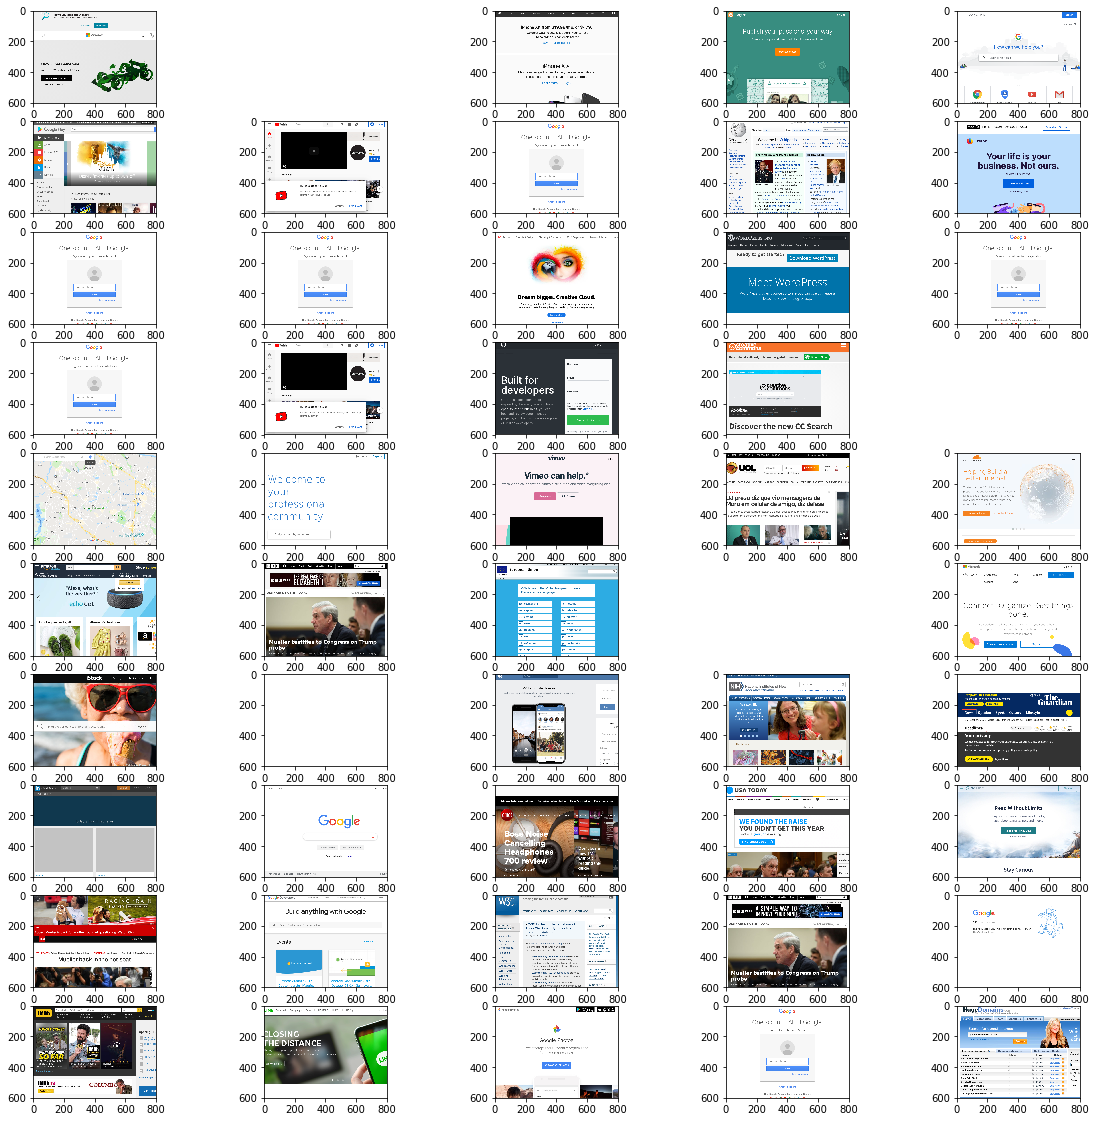

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import io
from tqdm import tqdm_notebook as tqdm

fig=plt.figure(figsize=(20, 20))
for i, key in enumerate(tqdm(Out[35])):
    if not isinstance(key, str): continue
    fig.add_subplot(10, 5, 1 + i)
    plt.imshow(plt.imread(io.BytesIO(LOAD(key))))
